# Character Shifts in Harry Potter Fanfics

# Evaluation of Word Embedding Models

### Last updated: 19.01.2022

# 0. Preliminaries

Import Modules

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

C:\Users\Brottrager\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
path_models = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\vector_models'
path_pickled = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\pickled'
path_data = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\data'

Load FF models

In [3]:
model_name = 'modelHPFFs'
#model_name = 'modelHPoriginals'

In [4]:
models = []
directory = path_models
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".kv") and filename.startswith(model_name):
         models.append(("model " + filename.split("_")[0][-1], KeyedVectors.load(os.path.join(directory, filename))))

Get tests (Google semantic/syntactic analogy datasets, paradigmatic semantic relation dataset, Schmidt word pairs) 

In [5]:
google_analogies = path_data + '\\model_evaluation\de_trans_Google_analogies.txt'
para_analogies = path_data + '\\model_evaluation\de_sem-para_SemRel.txt'
word_pairs = path_data + '\\model_evaluation\de_re-rated_Schm280.txt'

# 1. Semantic Evaluation

Evaluate models

In [6]:
ticks = ["google_acc", "para_acc", "word_pairs"]
data = {}
for tick in ticks:
    data[tick] = [tick]
for (_, model) in models:
    google_acc = model.evaluate_word_analogies(datapath(google_analogies))[0]
    para_acc = model.evaluate_word_analogies(datapath(para_analogies))[0]
    pvalue, spear, _ = model.evaluate_word_pairs(datapath(word_pairs), delimiter="\t")
    
    data["google_acc"].append(google_acc)
    data["para_acc"].append(para_acc)
    data["word_pairs"].append(spear.correlation)

Plot accuracy tests

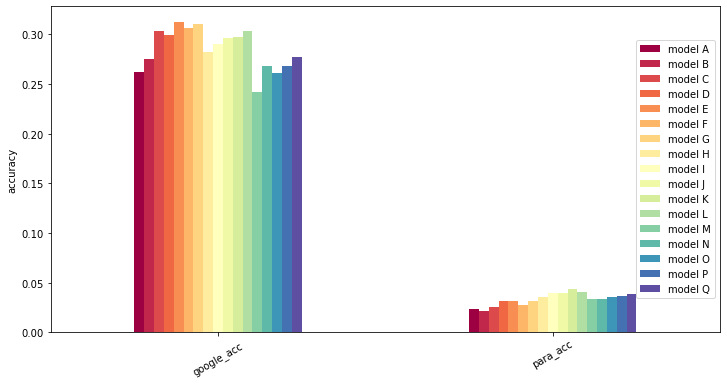

In [7]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

df_acc = pd.DataFrame([data["google_acc"], data["para_acc"]],
                   columns=['Test'] + [modelname for (modelname, _) in models])
df_acc.plot(x='Test',
        kind='bar',
        stacked=False,
        title='',
        colormap="Spectral",
        ax=ax,
        legend=False,
        rot=30,
        xlabel="",
        ylabel="accuracy")

plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.5))

fig.savefig(path_models + '\\model_eval_acc_' + model_name + '.png', dpi=300, bbox_inches = 'tight')

Plot correlation test

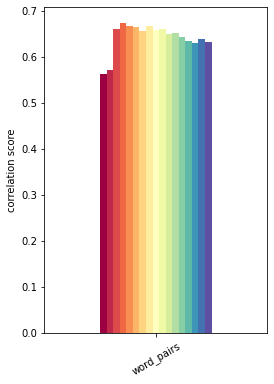

In [8]:
fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)

df_spear = pd.DataFrame([data["word_pairs"]],
                   columns=['Test'] + [modelname for (modelname, _) in models])
df_spear.plot(x='Test',
        kind='bar',
        stacked=False,
        title='',
        colormap="Spectral",
        ax=ax,
        legend=False,
        rot=30,
        xlabel="",
        ylabel="correlation score")

fig.savefig(path_models + '\\model_eval_corr_' + model_name + '.png', dpi=300, bbox_inches = 'tight')